In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)


In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# News Outlets 
target_users = ("@BBC","@CBSNews","@CNN","@FoxNews", "@nytimes")

In [4]:
# Initialize list holding sentiments
sentiments = []

# Loop through and grab the most recent 100 tweets per term
for user in target_users:    
    # Get all tweets from home feed    
    public_tweets = api.search(user, count=100, result_type="recent")
    
    # Initialize counter to track tweets
    counter = 0
    
    for tweet in public_tweets["statuses"]:
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        tweets_ago = counter
        converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        time_diff = 0 
        
        sentiments.append({"User" : user,
                           "RawDate": tweet["created_at"],
                           "ConvertedDate": converted_time,
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Text": tweet["text"],
                           "TimeDiff": time_diff})
        #Increment counter
        counter = counter + 1
                           

In [5]:
# Create DataFrame from Results List
news_sentiments = pd.DataFrame.from_dict(sentiments)

In [6]:
news_sentiments.head()

,Compound,ConvertedDate,Negative,Neutral,Positive,RawDate,Text,TimeDiff,Tweets Ago,User
0,0.0772,2018-10-03 21:27:15+00:00,0.000,0.936,0.064,Wed Oct 03 21:27:15 +0000 2018,RT @carolecadwalla: Number of @bbc reports on ...,0,0,@BBC
1,0.0772,2018-10-03 21:27:13+00:00,0.000,0.936,0.064,Wed Oct 03 21:27:13 +0000 2018,RT @carolecadwalla: Number of @bbc reports on ...,0,1,@BBC
2,0.0772,2018-10-03 21:27:12+00:00,0.000,0.936,0.064,Wed Oct 03 21:27:12 +0000 2018,RT @carolecadwalla: Number of @bbc reports on ...,0,2,@BBC
3,-0.5267,2018-10-03 21:27:08+00:00,0.206,0.794,0.000,Wed Oct 03 21:27:08 +0000 2018,RT @carolecadwalla: When @BBCPanorama dropped ...,0,3,@BBC
4,-0.5267,2018-10-03 21:27:07+00:00,0.206,0.794,0.000,Wed Oct 03 21:27:07 +0000 2018,RT @carolecadwalla: When @BBCPanorama dropped ...,0,4,@BBC


In [7]:
#Export the DataFrame to as csv.
news_sentiments.to_csv("News_Mood.csv", index=False)

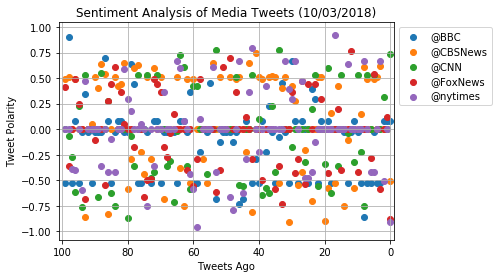

In [8]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)
#plt.figure(figsize=(10,10))

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (10/03/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [9]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC       -0.111231
@CBSNews    0.077148
@CNN       -0.030994
@FoxNews   -0.027697
@nytimes   -0.009233
Name: Compound, dtype: float64

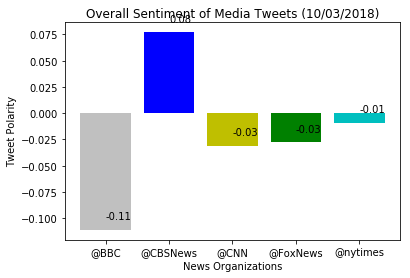

In [10]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

# Set the labels, title, save and show the plot
plt.title("Overall Sentiment of Media Tweets (10/03/2018)")
plt.xlabel("News Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()